<a href="https://colab.research.google.com/github/Parsayarya/Cifar-10/blob/main/Cifar_10Classification0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


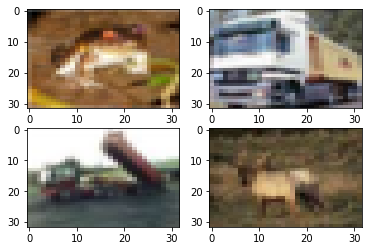

In [ ]:
fig, ax = plt.subplots(2, 2)
k = 0
 
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [ ]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [ ]:
model.compile(optimizer = 'adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0874 - accuracy: 0.6193 - val_loss: 1.1449 - val_accuracy: 0.6178
Epoch 2/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8097 - accuracy: 0.7193 - val_loss: 1.4647 - val_accuracy: 0.5993
Epoch 3/50
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6638 - accuracy: 0.7731 - val_loss: 0.7567 - val_accuracy: 0.7435
Epoch 4/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5569 - accuracy: 0.8103 - val_loss: 0.6927 - val_accuracy: 0.7715
Epoch 5/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4772 - accuracy: 0.8366 - val_loss: 0.6466 - val_accuracy: 0.7865
Epoch 6/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4026 - accuracy: 0.8624 - val_loss: 0.6331 - val_accuracy: 0.7979
Epoch 7/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.3391 - accuracy: 0.8834 - val_loss: 0.6154 -

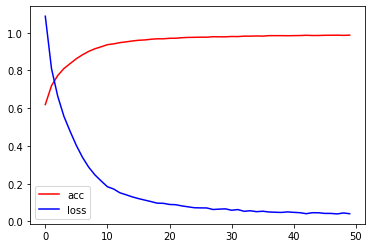

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['loss'],label="loss",color="blue")
plt.legend()

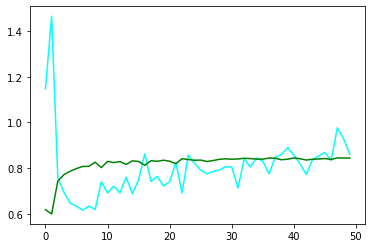

In [ ]:
plt.plot(r.history['val_loss'],label="val_loss",color="cyan")
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.show()

Original label is dog and predicted label is dog


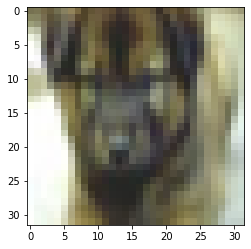

In [ ]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
 
# select the image from our test dataset
image_number = 33
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [ ]:
model.save('Cifar-10Model.h5')
